## 02 First Exploration

This section aims to provide a generall understanding of the unprocessed data. Folowing questions aim to be answered:

    1. How many tweets are provided?
    2. Which timespan is covered by the data?
    2. How many tweets are provided distributed over time?
    3. How many tweets are provided in each language?
    4. How many tweets are provided in each language distributed over time?
    5. How many tweets are duplicated on the same day?
    6. How many tweets are duplicated on the same day distributed over time?
    7. How many tweets are duplicated on the same day distributed over languages?

Those insights are necessary to prepare for further processing steps like deciding which data to keep and or translate.
Also those informations can be used later on to check if changes on the dataset were correct.


### Look at single examples

In [5]:
import pandas as pd

# df_example = pd.read_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/20230611.csv",  lineterminator='\n')
# print(df_example.columns)
example = df_example.sample(100).iloc[12]
print(df_example.columns)
print(f"user id {example['userid']}")
print(f"username {example['username']}")
print(f"tweetcreatedts {example['tweetcreatedts']}")
print(f"language {example['language']}")
print(f"location {example['location']}")
print(f"text {example['text']}")
print(f"hashtags {example['hashtags']}")

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'userid',
       'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts',
       'is_duplicate'],
      dtype='object')
user id 1265207601886892032
username thaerith
tweetcreatedts 2023-06-11 15:36:17
language fr
location nan
text #Ukraine Update. Une autre voie ferrée stratégique en Crimée a sauté dans le district d'Islamterets (Kirovsky). c'est la liaison pont de Kerch vers Dzhankoy qui aurait été touchée. 
à confirmer mais cette série de frappes et de sabotage c

### Data Preparation and Aggregation

Dataset is too big to load it into the ram at once. So every single csv file will be aggregated to a single row in an overview dataframe.
For every csv following data will be extracted:

    1. Number of rows.
    2. Number of rows with "is_retweet" flag true or beeing duplicated in the same csv.
    3. Date.
    4. Number of unique users.
    5. For every language the number of tweets in that language.
    6. For every language the number of duplicated or "is_retweet" tweets.
    
This DataFrame is then saved in AggregatedData/agg.csv.
For more implementation details see ./src/first_exploration_02.py.

In [1]:
from src.first_exploration_02 import aggregate_dataframe
from src.utility import aggregate_data
import pandas as pd

path_data = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/"
agg_path = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/agg.csv"

# aggregate_data(path_data, agg_path, aggregate_dataframe)
df_agg = pd.read_csv(agg_path)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path_data = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/"
agg_path = (
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/agg_test_1.csv"
)
df_test = aggregate_data(path_data, agg_path, aggregate_dataframe)

  0%|          | 0/476 [00:00<?, ?it/s]

100%|██████████| 476/476 [15:20<00:00,  1.93s/it]   


In the following cell are all languages that are in the dataset. For simplicity reasons and for limitation of computational effort i think i will limit the languages to top languages, as shown in selected languages. There will be a bigger chapter on the reasons for this decision later on.

In [2]:
import numpy as np

languages = np.array(
    [
        "am",
        "ar",
        "bg",
        "bn",
        "ca",
        "ckb",
        "cs",
        "cy",
        "da",
        "de",
        "dv",
        "el",
        "en",
        "es",
        "et",
        "eu",
        "fa",
        "fi",
        "fr",
        "gu",
        "hi",
        "ht",
        "hu",
        "hy",
        "in",
        "is",
        "it",
        "iw",
        "ja",
        "ka",
        "kn",
        "ko",
        "lt",
        "lv",
        "ml",
        "mr",
        "my",
        "ne",
        "nl",
        "no",
        "or",
        "pa",
        "pl",
        "ps",
        "pt",
        "ro",
        "ru",
        "si",
        "sl",
        "sr",
        "sv",
        "ta",
        "te",
        "th",
        "tl",
        "tr",
        "uk",
        "und",
        "ur",
        "vi",
        "zh",
        "sd",
        "km",
        "lo",
        "ug",
        "bo",
    ]
)

selected_languages = np.array(["en", "de", "fr", "it", "es", "uk", "ru"])

In this section are some statistics about the dataset just printed out.

In [ ]:
from src.first_exploration_02 import exploration_in_numbers

exploration_in_numbers(df_agg)

Tweets total: 70885956.
First date: 2022-02-24.  Last date: 2023-06-14. Unique dates: 476.
Tweets duplicated or retweeted on the same day total: 40775304. Tweets duplicated on the same day percent: 57.52%
Tweets not duplicated or retweeted on the same day total: 30110652
Tweets in a single file on average: 148920.0756302521, with variance: 17414183791.64479 and max: 567745 and min: 6892 


Print some tabular infornation about all the languages. Select all languages or selected_languages to see different aggregations. Note that in languages the second most common language "und" stands for undefined. In selected languages all other languages and undefined are aggregated into "others". Row "dupl" means the percentage of duplicated tweets in that particular language.

In [ ]:
from src.first_exploration_02 import languages_tabular

languages_tabular(df_agg, selected_languages)
languages_tabular(df_agg, languages)

Language   |           Count |       Freq |     Dupl % 
en         |        44416876 |     62.66% |     62.91%  
others     |         9920771 |     14.00% |     35.42%  
de         |         3872212 |      5.46% |     53.51%  
fr         |         3795086 |      5.35% |     66.05%  
it         |         3262053 |      4.60% |     58.51%  
es         |         3113760 |      4.39% |     60.38%  
uk         |         1541110 |      2.17% |     35.42%  
ru         |          964087 |      1.36% |     42.04%  
Language   |           Count |       Freq |     Dupl % 
en         |        44416876 |     62.66% |     62.91%  
und        |         3898230 |      5.50% |     24.57%  
de         |         3872212 |      5.46% |     53.51%  
fr         |         3795086 |      5.35% |     66.05%  
it         |         3262053 |      4.60% |     58.51%  
es         |         3113760 |      4.39% |     60.38%  
uk         |         1541110 |      2.17% |     35.42%  
ru         |          964087 |   

A bar h graph shows statistics for selected languages. Not selected are summed in others. Percentage on the right shows percentage of all tweets. Number in the middle is count of tweets. Red and blue bars show the percentage of duplicated and not duplicated.

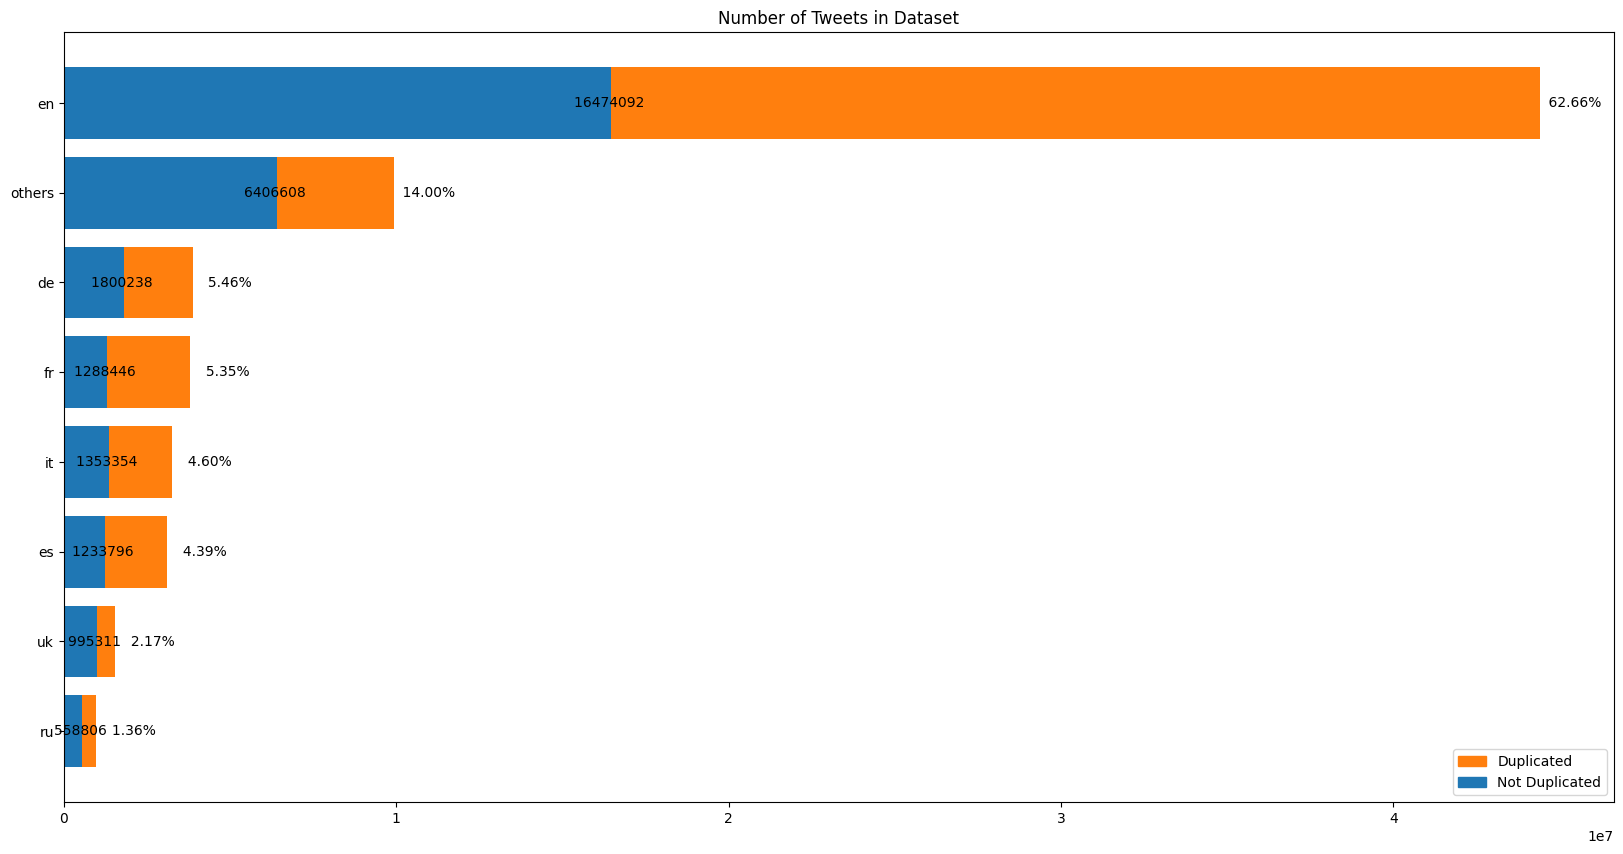

In [ ]:
import src.first_exploration_02
from src.first_exploration_02 import languages_bar_h
import importlib

importlib.reload(src.first_exploration_02)
languages_bar_h(df_agg, selected_languages)

Percentage of each language shown as a Pi Graph. Once with duplicates and once without.

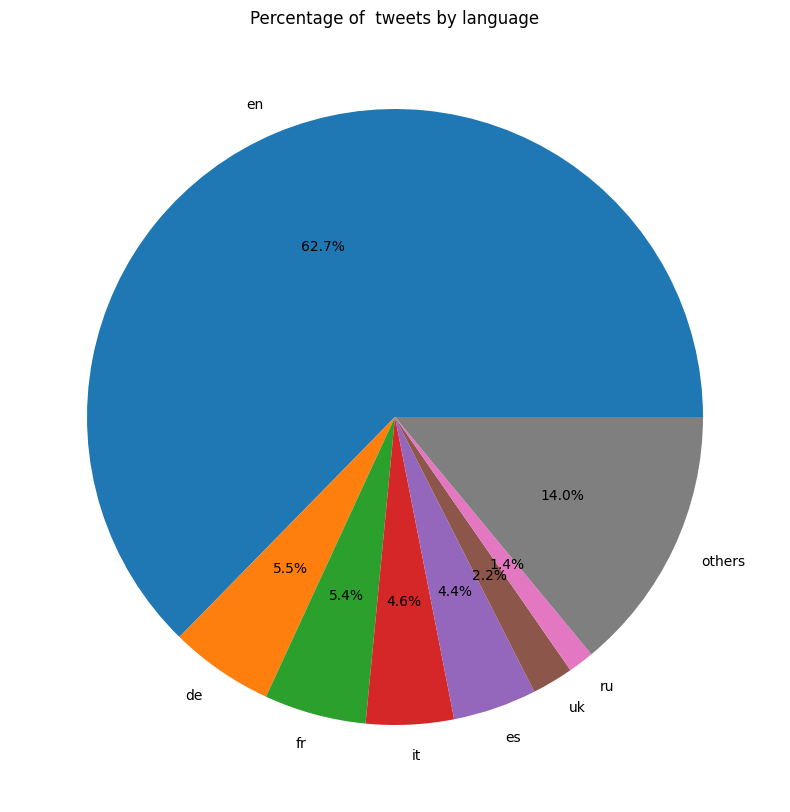

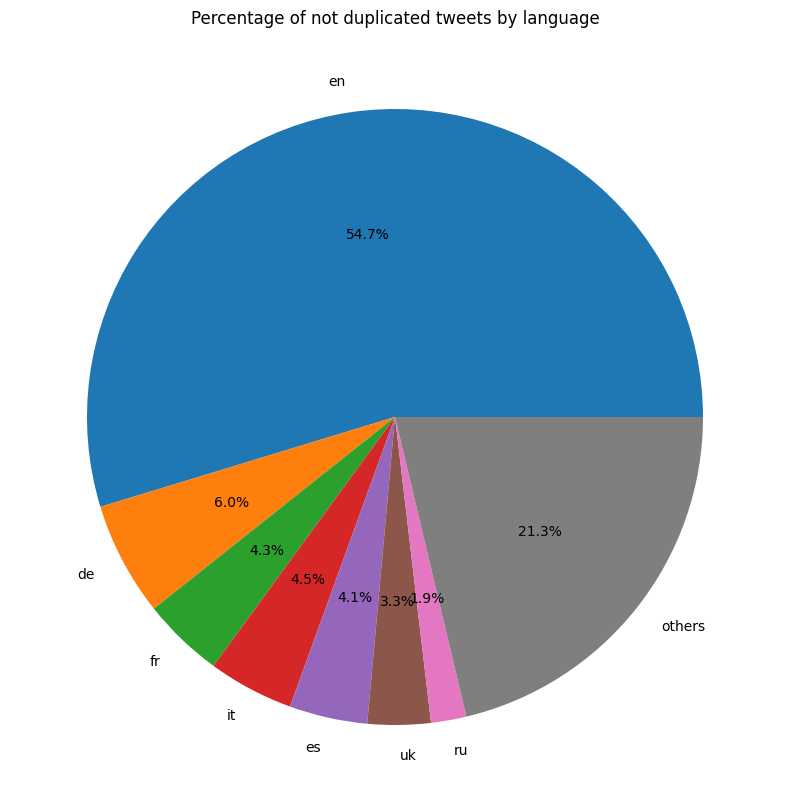

In [ ]:
from src.first_exploration_02 import pi_lang_freq

# sns.set_style("whitegrid")
pi_lang_freq(df_agg, selected_languages, not_dupl=False)
pi_lang_freq(df_agg, selected_languages, not_dupl=True)

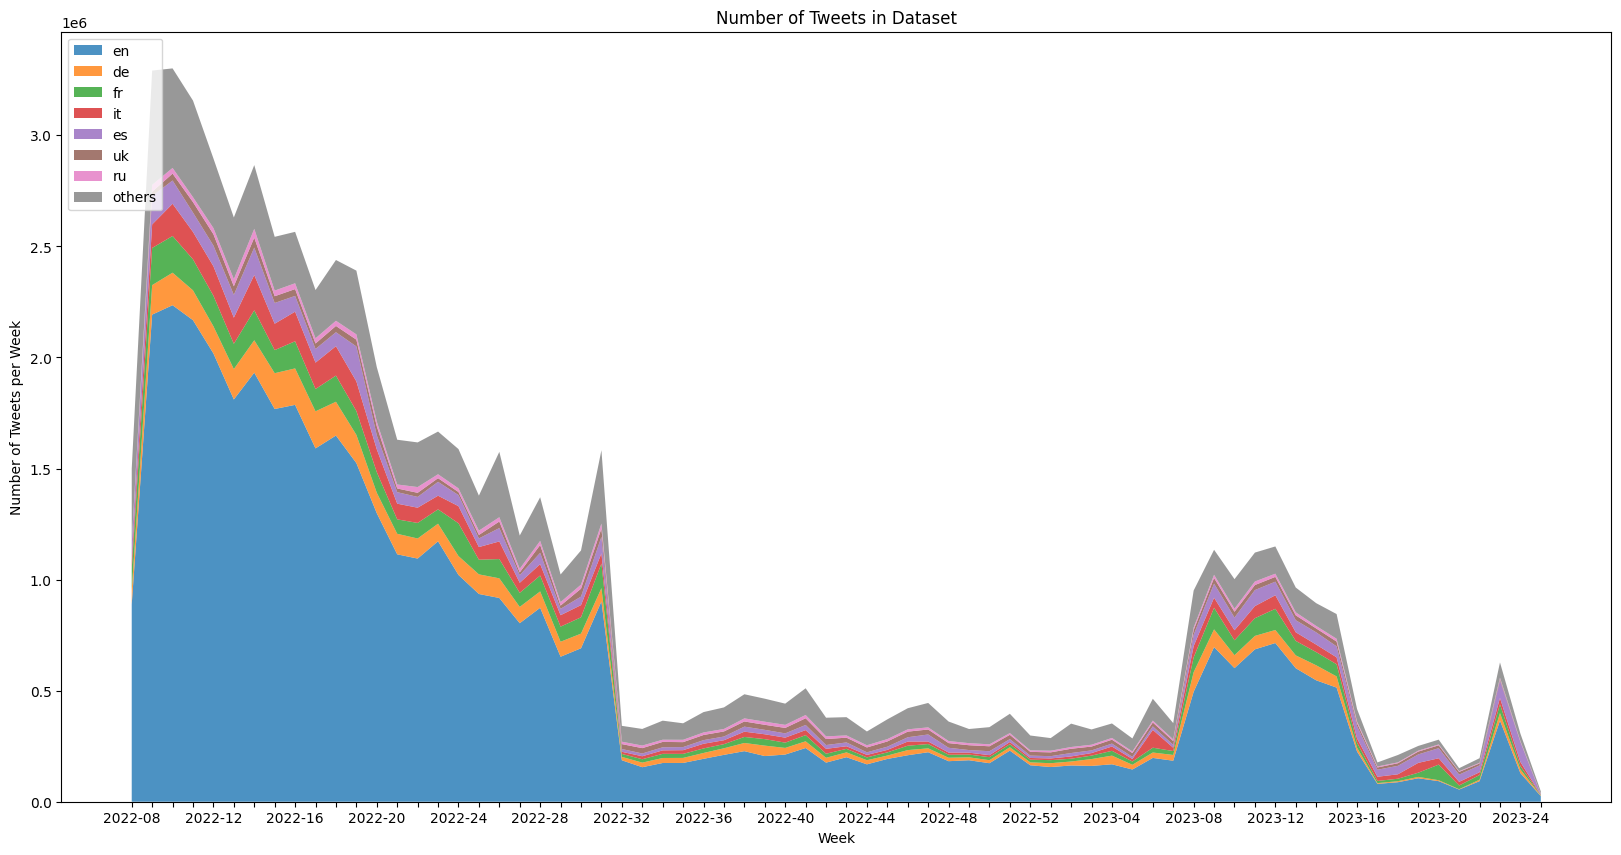

In [7]:
from src.first_exploration_02 import stackplot_languages_over_weeks

stackplot_languages_over_weeks(df_agg, selected_languages)

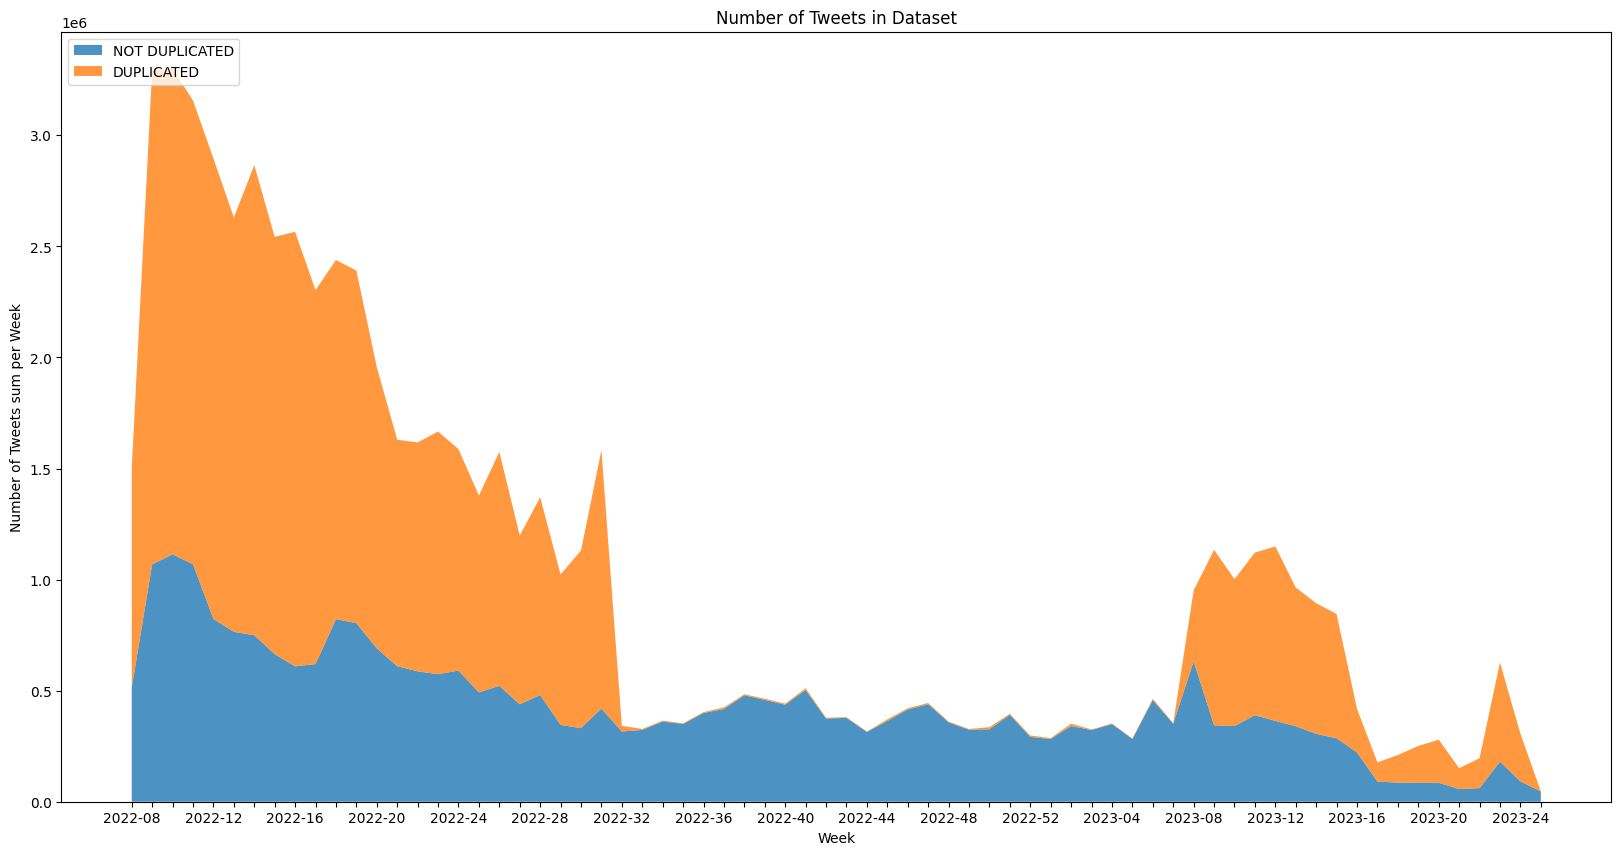

In [6]:
from src.first_exploration_02 import stackplot_duplicates_over_weeks

stackplot_duplicates_over_weeks(df_agg)

Explanation:
[Link to Kaggle](https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/data)

The creator of this dataset states the following:

[Aug 09]
Significant drop in tweets extracted, but I am now getting ORIGINAL/ NON-RETWEETS.

[Aug 08]
I've noticed that I had a spike of Tweets extracted, but they are literally thousands of retweets of a single original tweet. I also noticed that my crawlers seem to deviate because of this tactic being used by some Twitter users where they flood Twitter with tweets using a hashtag like "#Ukraine" but also add their own hashtag in it. Starting tomorrow, all the extracted data I will be pulling out of twitter will be NON RETWEETS. I will observe on what will be the effect on the total tweets per day for this config change. 

And:

[Feb 26]
I've started to pull in RETWEETS again, so I am expecting a significant amount of throughput in tweets again on top of the dedicated processes that I have that gets NONRETWEETS. If you don't want RETWEETS, just filter them out. 


Which explains the drop of duplicated tweets around 2022-32 and the increase around 2023-08.

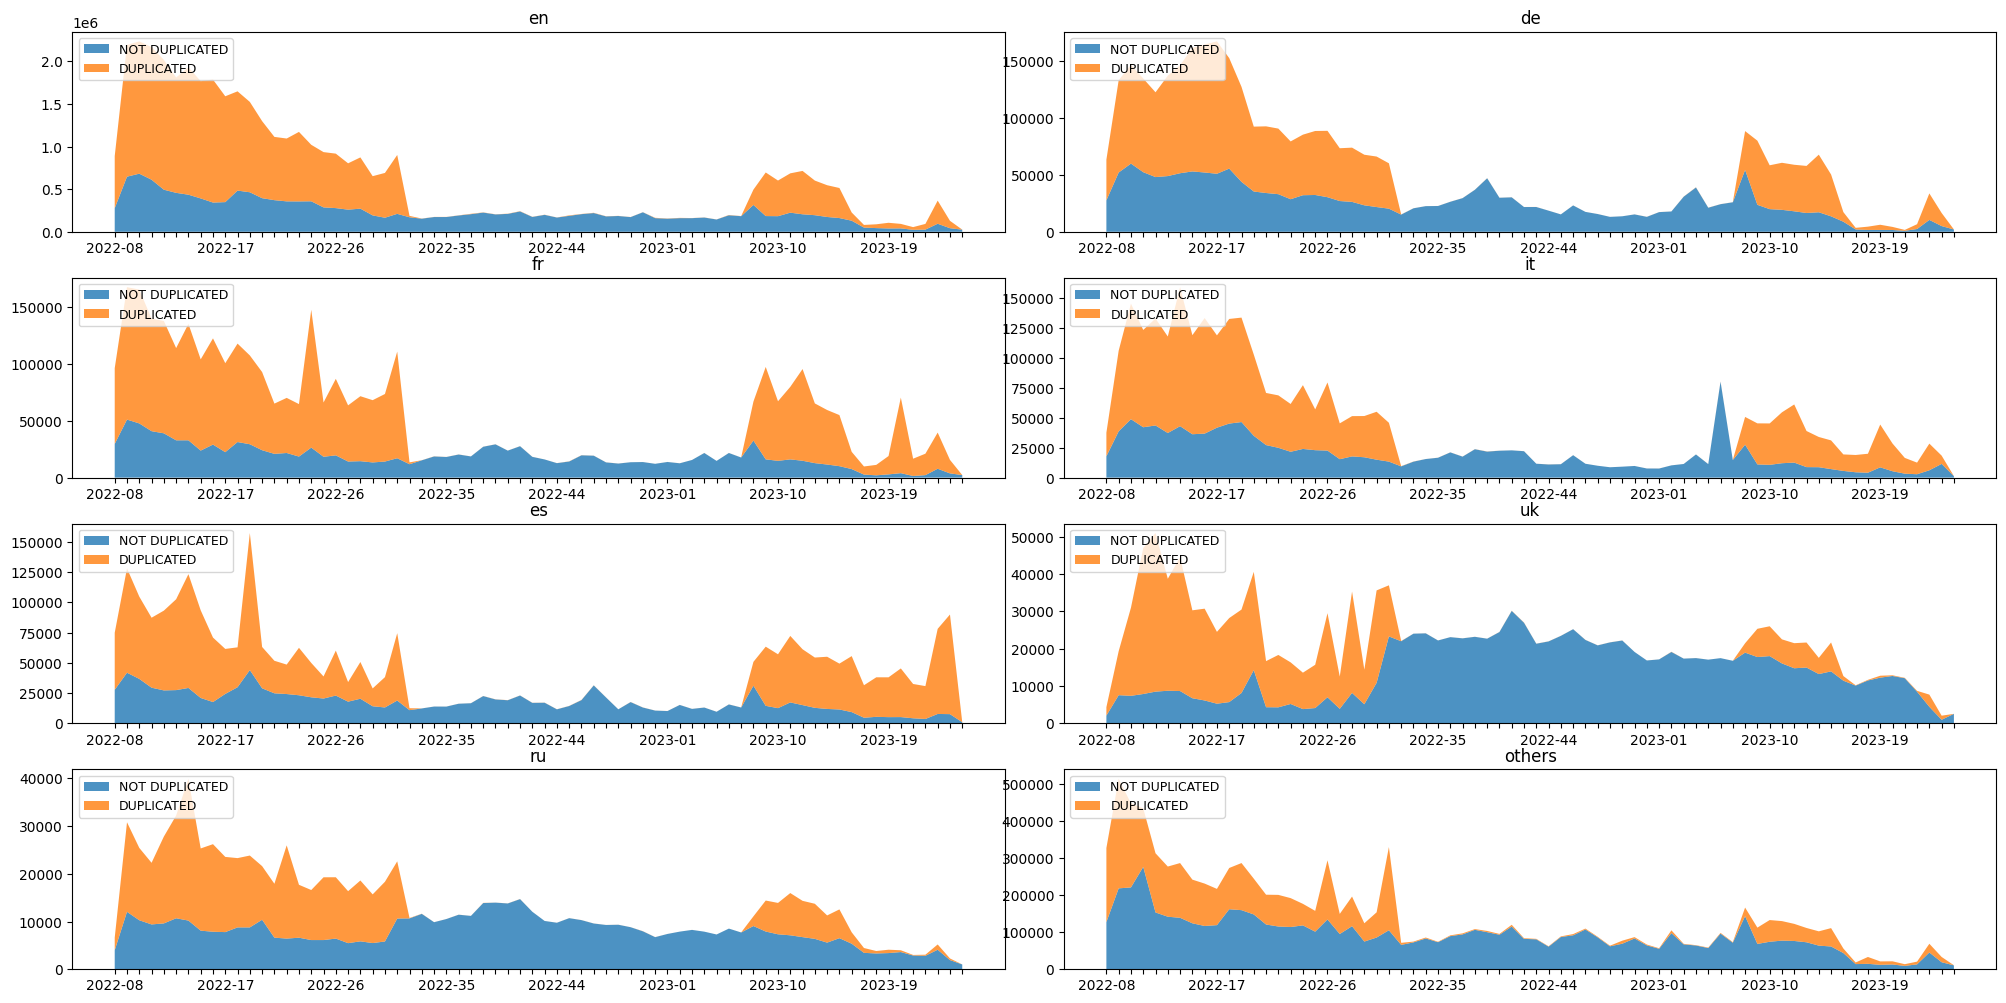

In [5]:
from src.first_exploration_02 import stackplot_duplicates_over_weeks_multipl

stackplot_duplicates_over_weeks_multipl(df_agg, selected_languages)

### Tweet Length in Characters over Time

In [2]:
import pandas as pd
from src.utility import iterate_dataframes
from src.data_schemas import OrigDataSchema
import numpy as np

selected_languages = np.array(["en", "de", "fr", "it", "es", "uk", "ru"])
df_list = []
for df in iterate_dataframes(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/archive/"
):
    df = df[df[OrigDataSchema.LANGUAGE].isin(selected_languages)]
    df["len"] = df[OrigDataSchema.TEXT].str.len()
    df = df[["len", OrigDataSchema.TIMESTAMP, OrigDataSchema.LANGUAGE]]
    df_list.append(df)
from tqdm.auto import tqdm

# register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()
df = pd.concat(df_list)
df = df[df[OrigDataSchema.TIMESTAMP].str.len().isin([19, 26])]
df["weeks"] = (
    df[OrigDataSchema.TIMESTAMP]
    .progress_apply(pd.to_datetime)
    .apply(
        lambda x: (
            str(x.year) + "-" + str(x.week)
            if len(str(x.week)) == 2
            else str(x.year) + "-0" + str(x.week)
        )
    )
)
df_weeks = df.groupby(["weeks", "language"])["len"].mean()
df_weeks.to_csv(
    "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/tweet_length_per_weeks.csv"
)

  0%|          | 0/476 [00:00<?, ?it/s]

100%|██████████| 476/476 [07:45<00:00,  1.02it/s]


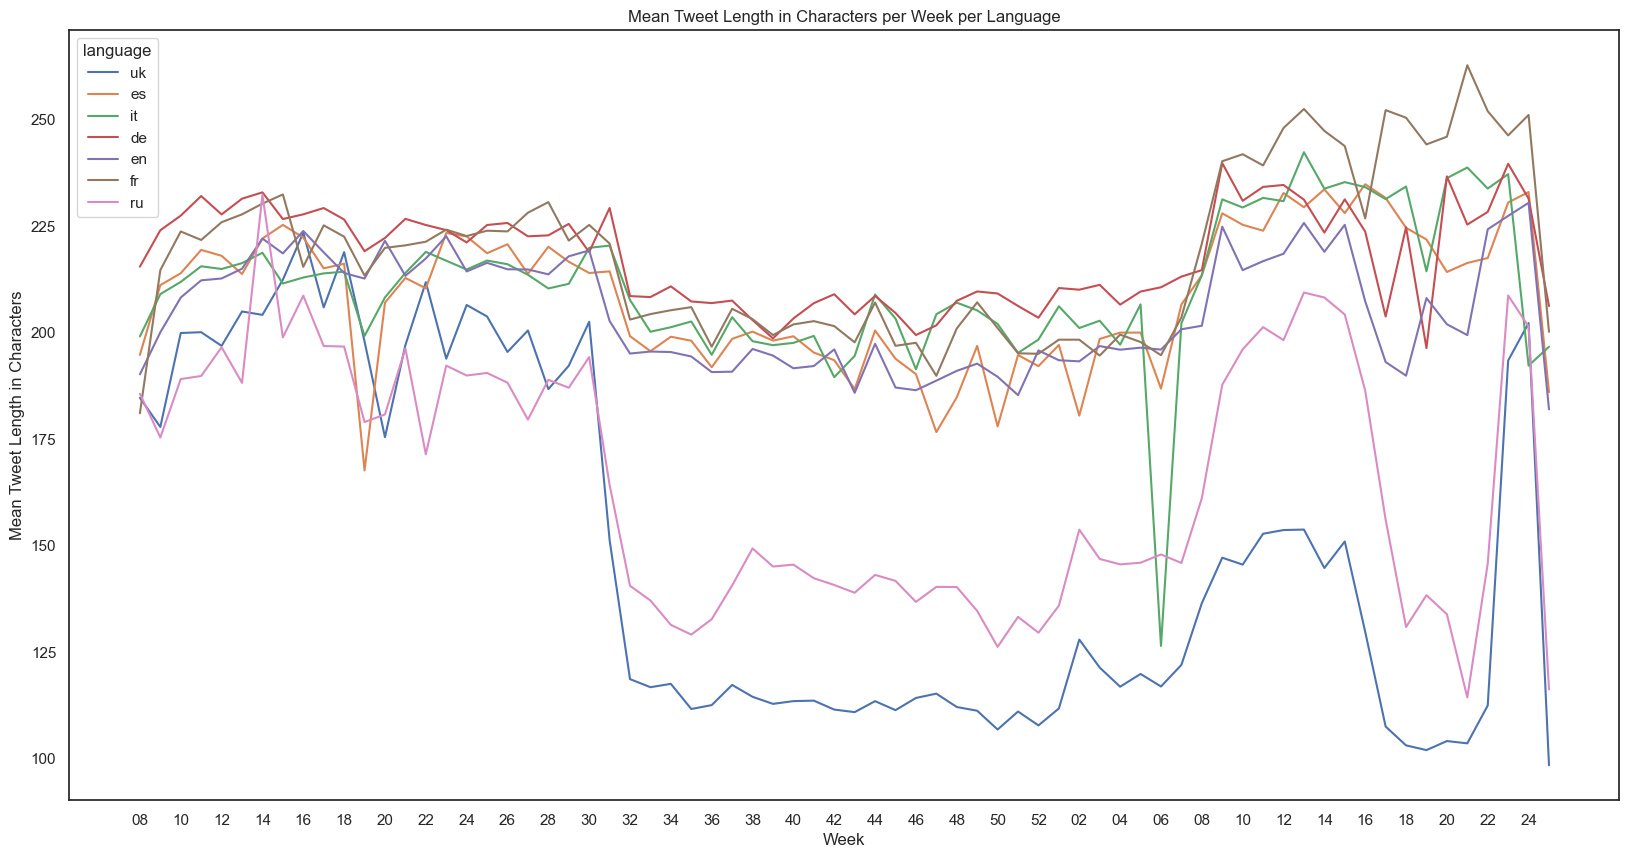

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]
# df_weeks = pd.read_csv('/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/AggregatedData/tweet_length_per_weeks.csv')
ax = sns.lineplot(
    data=df_weeks.reset_index(),
    x="weeks",
    y="len",
    hue="language",
    hue_order=["uk", "es", "it", "de", "en", "fr", "ru"],
)
sns.set_style("white")
sns.set_theme()
index = ["" for _ in range(len(df_weeks.reset_index()["weeks"].unique()))]
index[::2] = [x[-2:] for x in list(df_weeks.reset_index()["weeks"].unique())][::2]
# sns.set_theme(style="whitegrid")
ax.set_xticks(range(70))
ax.set_xticklabels(index)
ax.set_title("Mean Tweet Length in Characters per Week per Language")
ax.set_ylabel("Mean Tweet Length in Characters")
ax.set_xlabel("Week")
plt.show()